# Explore here

In [1]:
# Your code here
import pandas as pd

df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv', sep=';')

In [ ]:
df_raw.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df_raw.to_csv('../data/raw/df_raw.csv')

LIMPIEZA DE DATOS

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df_raw.shape

(41188, 21)

In [ ]:
# ¿Cuántos niveles tienen las columnas categóricas?: verificar si hay columnas con 1 solo tipo de registro y pueda no aportarnos informacion relevante.

df_categoricas = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome','y']

for col in df_categoricas:
    print(f'columna {col}: {df_raw[col].nunique()} niveles')

columna job: 12 niveles
columna marital: 4 niveles
columna education: 8 niveles
columna default: 3 niveles
columna housing: 3 niveles
columna loan: 3 niveles
columna contact: 2 niveles
columna month: 10 niveles
columna day_of_week: 5 niveles
columna poutcome: 3 niveles
columna y: 2 niveles


In [ ]:
for col in df_categoricas:
    print(f'columna {col}: {df_raw[col].unique()}')

columna job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
columna marital: ['married' 'single' 'divorced' 'unknown']
columna education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
columna default: ['no' 'unknown' 'yes']
columna housing: ['no' 'yes' 'unknown']
columna loan: ['no' 'yes' 'unknown']
columna contact: ['telephone' 'cellular']
columna month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
columna day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']
columna poutcome: ['nonexistent' 'failure' 'success']
columna y: ['no' 'yes']


In [8]:
df = df_raw.copy()

In [ ]:
# unificación de basic.4y,5y,6y en primary (columna education)
def reemplazar_basic(valor):
    if valor.startswith('basic'):
        return 'primary'
    else:
        return valor
df['education'] = df['education'].apply(reemplazar_basic)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,primary,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,primary,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [10]:
poutcome_nonexist_rows = (df['poutcome'] == 'nonexistent').sum()
pdays_999 = (df['pdays'] == 999).sum()

print(f'% poutcome nonexistent rows: {poutcome_nonexist_rows*100/df.shape[0]}')
print(f'% pdays 999 rows: {pdays_999*100/df.shape[0]}')

# poutcome y pdays presentan un alto porcentaje con datos noexistent y 999, respectivamente. Por lo tanto borrar (no aportan mucha información).

% poutcome nonexistent rows: 86.3431096435855
% pdays 999 rows: 96.32174419733903


In [ ]:
df.drop(['poutcome', 'pdays'], axis=1, inplace=True)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,primary,no,no,no,telephone,may,mon,261,1,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,primary,no,no,no,telephone,may,mon,151,1,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,0,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,0,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,0,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,0,-1.1,94.767,-50.8,1.028,4963.6,yes


In [12]:
# Podría ser necesario eliminar 'previous' más adelante, probablemente no esté aportando información relevante (75%_df = 0)

In [ ]:
# Filas duplicadas
print(f'Dimensiones df con duplicados: {df.shape}')
print(df.duplicated().sum())
df = df.drop_duplicates()
print(f'Dimensiones df sin duplicados: {df.shape}')

Dimensiones df con duplicados: (41188, 19)
15
Dimensiones df sin duplicados: (41173, 19)


ANÁLISIS UNIVARIANTE

Categóricas

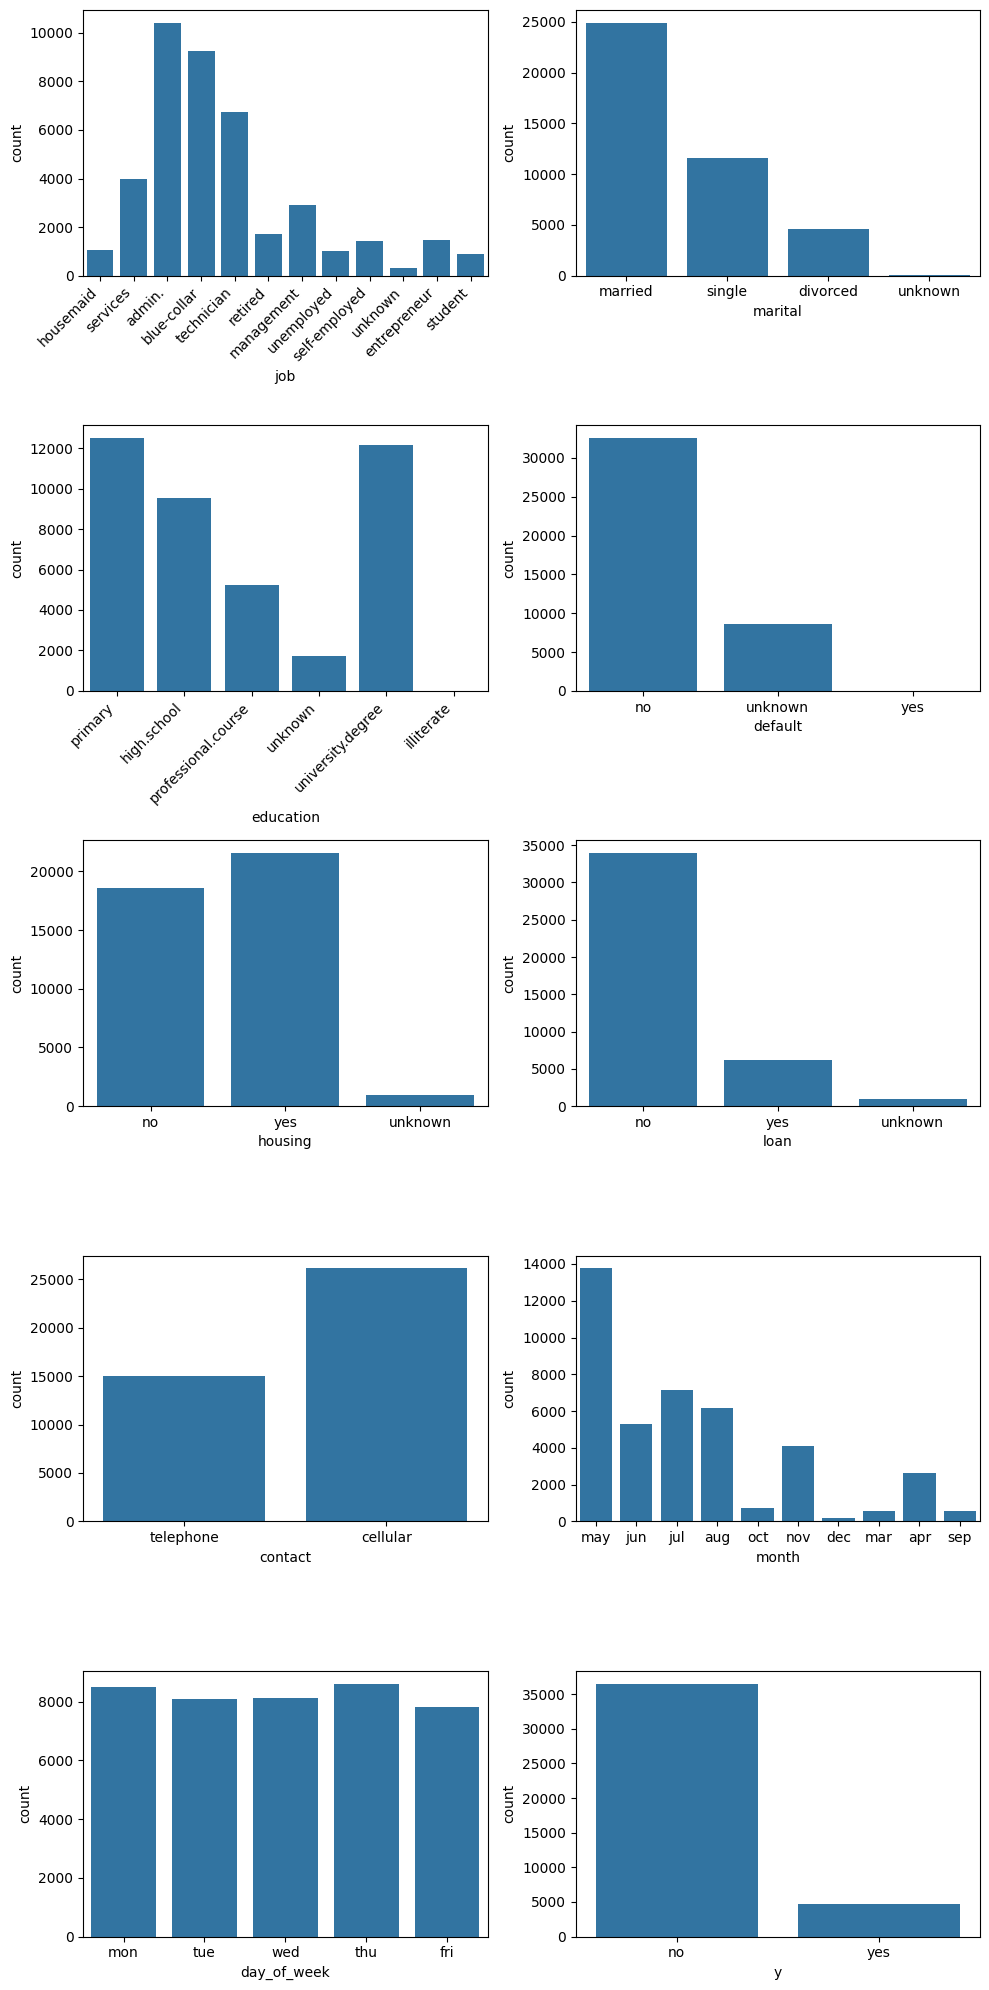

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

df_categoricas = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','day_of_week','y']

# Crear un gráficos de barra múltiple
fig, axis = plt.subplots(5, 2, figsize = (10, 20))

for i, categoría in enumerate(df_categoricas):
    row, col = i // 2, i % 2
    sns.countplot(ax=axis[row,col], data=df[df_categoricas], x=categoría)
    if categoría in ["job", "education"]:
        plt.setp(axis[row, col].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [15]:
# Job: Mayoría Administrativos, obreros y técnicos.
# Marital: Mayoría Casados
# Education: Mayoría con Grado Universitario y Enseñanza Media (high school) y Básica (al unir basic.4y, basic.6y, basic.9y).
# Default: Mayoría no tiene crédito actualmente
# Housing: Mayoría con préstamo de vivienda, pero por poco (no es un patrón tan evidente)
# Loan: Mayoría sin préstamo personal
# contact: por celular la mayoría
# month: contactados principalmente en mayo
# day_of_week: no presenta patrón en particular
# y: Mayoría no contrató el servicio.

Numéricas

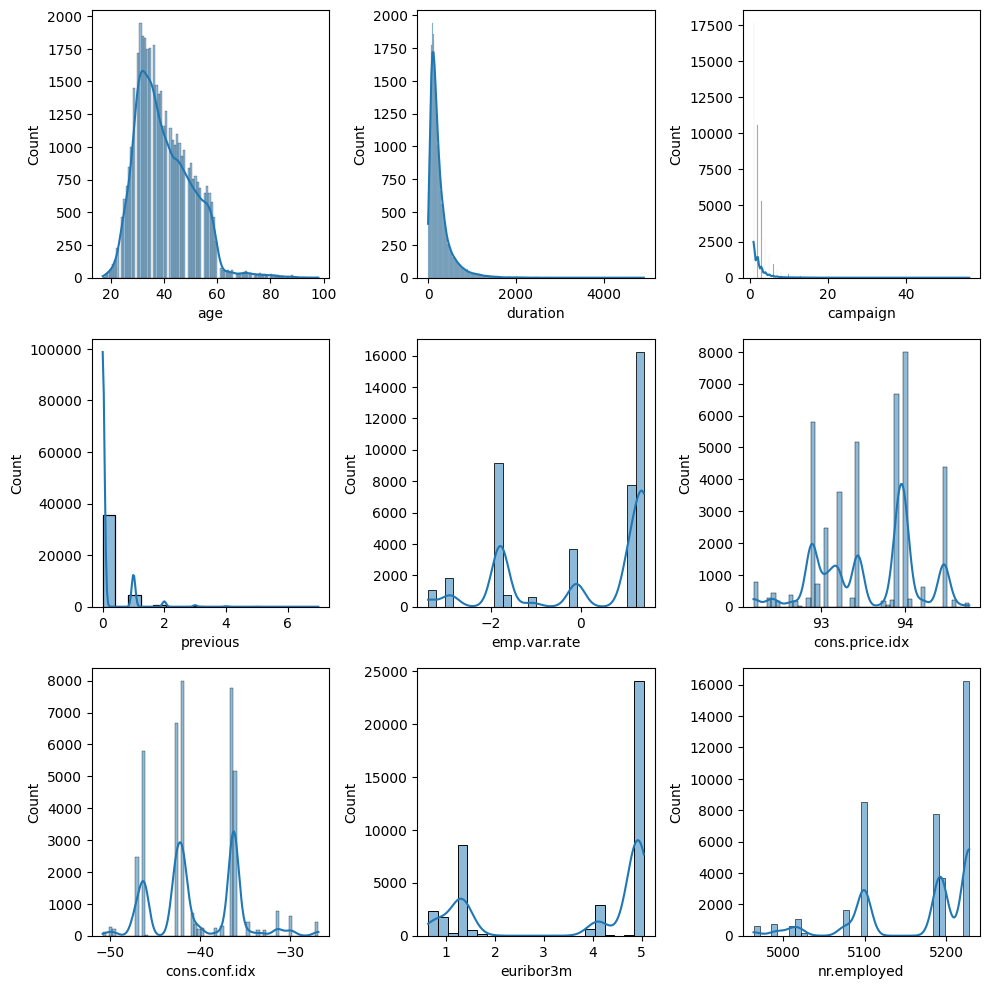

In [16]:
fig, axis = plt.subplots(3, 3, figsize = (10, 10))

numericas = ['age', 'duration', 'campaign', 'previous', 'emp.var.rate','cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

for i, num in enumerate(numericas):
    row, col = i // 3, i % 3
    sns.histplot(ax=axis[row,col], data=df[numericas], x=num, kde=True)

plt.tight_layout()
plt.show()

In [17]:
# age: es la única que tiende a distribuirse normal, aunque con cierta inclinación a la izquierda
# duration: está inclinada hacia la izquierda
# campaign también hacia la izquierda

ANÁLISIS MULTIVARIADO CATEGÓRICO

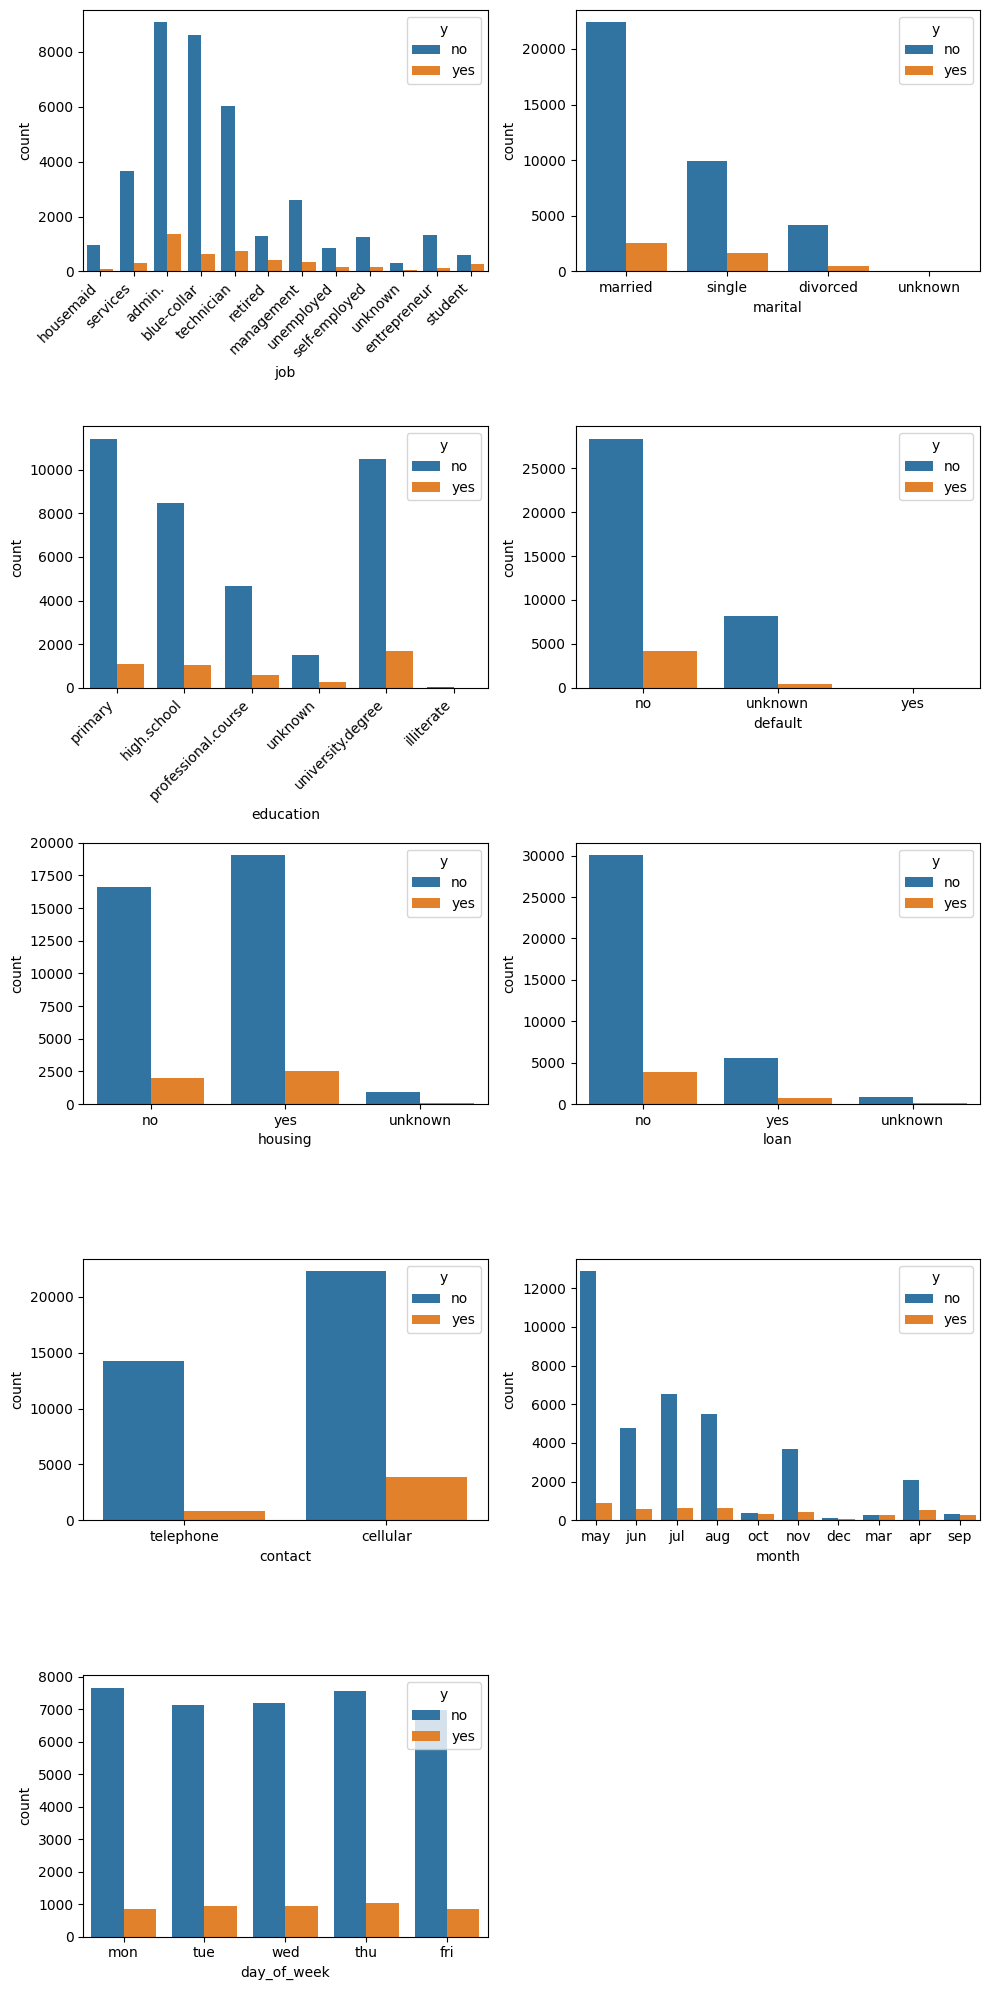

In [18]:
fig, axis = plt.subplots(5, 2, figsize = (10, 20))

for i, categoría in enumerate(df_categoricas):
    row, col = i // 2, i % 2
    sns.countplot(ax=axis[row,col], data=df[df_categoricas], x=categoría, hue='y')
    if categoría in ["job", "education"]:
        plt.setp(axis[row, col].get_xticklabels(), rotation=45, ha='right')

plt.delaxes(axis[4,1])
plt.tight_layout()
plt.show()

In [19]:
# probablemente borrar day_of_week
# default: quienes no tienen crédito parecieran contratar depósito a plazo vs los que sí tienen
# loan: sin préstamo personal parecieran contratar más depósito a plazo que aquellos que sí tienen
# contact: x celular parecieran contratar más que x telefono

ANALISIS CORRELACIÓN

(Númericas y Categóricas factorizadas)

In [20]:
# Copia del df en el cual factorizar las variables categóricas y correlacionar
df_corr = df.copy()

In [ ]:
# factorizar todas las categóricas

for col in df_categoricas:
    df_corr[col] = pd.factorize(df_corr[col])[0]

df_corr

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,0,0,0,0,0,0,0,0,0,261,1,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,1,0,1,1,0,0,0,0,0,149,1,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,1,0,1,0,1,0,0,0,0,226,1,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,2,0,0,0,0,0,0,0,0,151,1,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,1,0,1,0,0,1,0,0,0,307,1,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,0,2,0,1,0,1,5,4,334,1,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,3,0,2,0,0,0,1,5,4,383,1,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,0,4,0,1,0,1,5,4,189,2,0,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,4,0,2,0,0,0,1,5,4,442,1,0,-1.1,94.767,-50.8,1.028,4963.6,1


<Axes: >

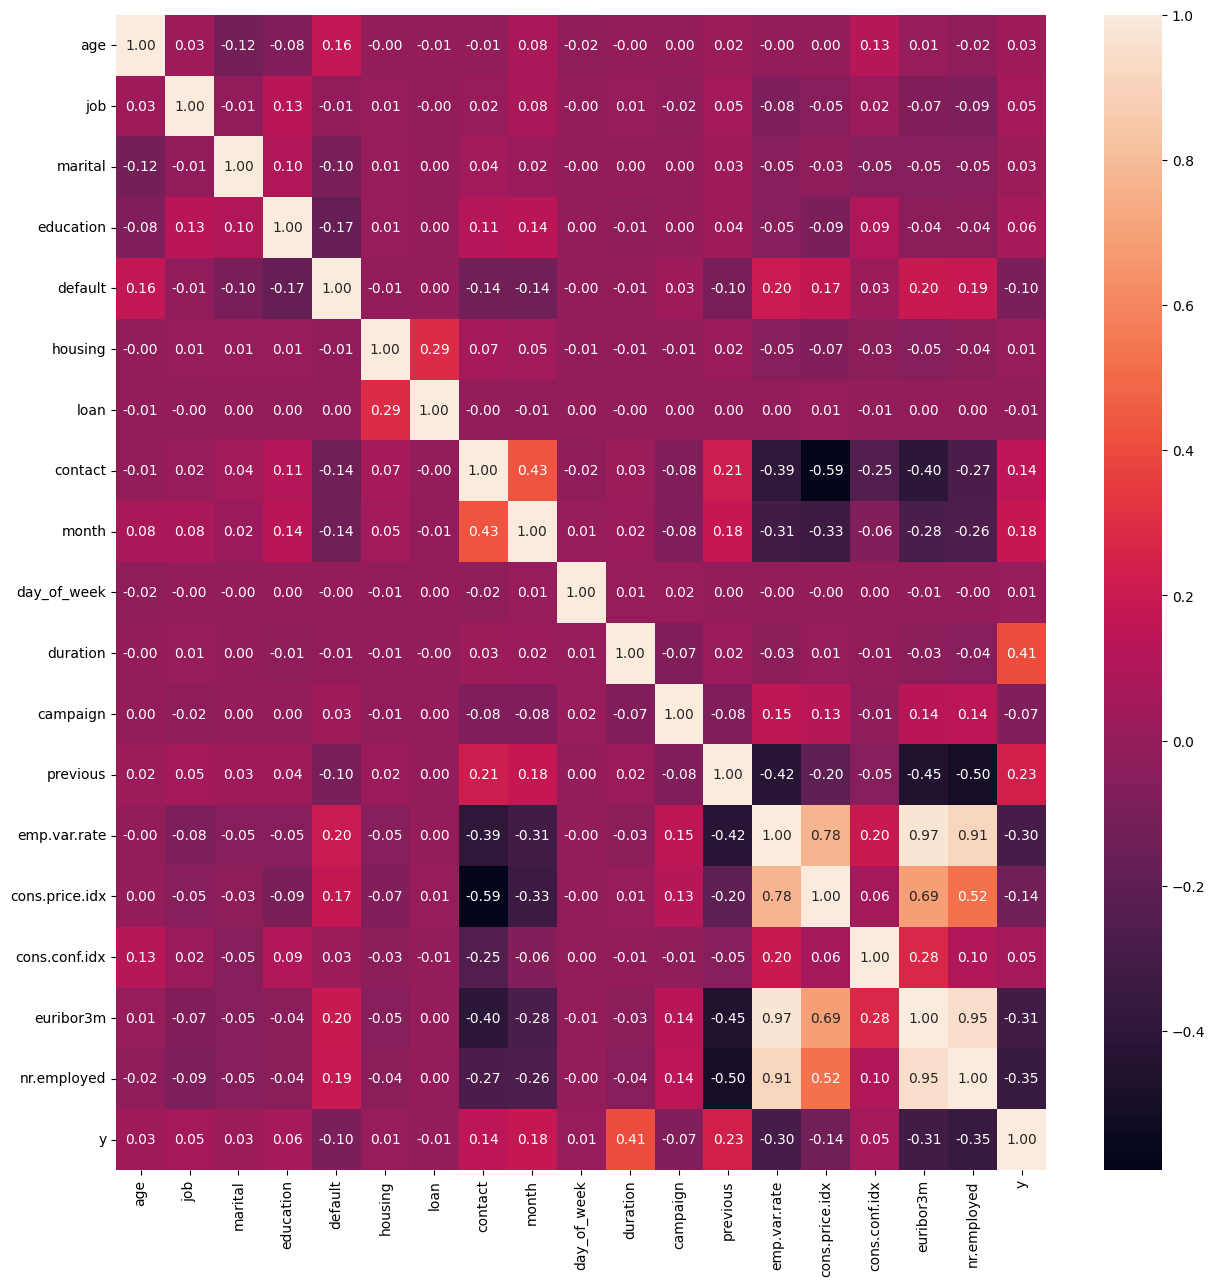

In [ ]:
fig, axis = plt.subplots(figsize = (15, 15))

sns.heatmap(df_corr.corr(), annot = True, fmt = ".2f")

In [23]:
df_corr.drop(['day_of_week'], axis=1, inplace=True)


In [ ]:
df_corr.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'duration', 'campaign', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [25]:
df_corr.to_csv('../data/processed/df_corr.csv', index=False)

INGENIERÍA DE CARACTERÍSTICAS

In [ ]:
df_corr[numericas].describe()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41173.000000,41173.000000,41173.000000,41173.000000,41173.000000,41173.000000,41173.000000,41173.000000,41173.000000
mean,40.023462,258.320671,2.567969,0.173002,0.082059,93.575770,-40.502448,3.621463,5167.039820
std,10.420951,259.312867,2.770396,0.494964,1.570858,0.578831,4.627773,1.734387,72.251669
min,17.000000,0.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


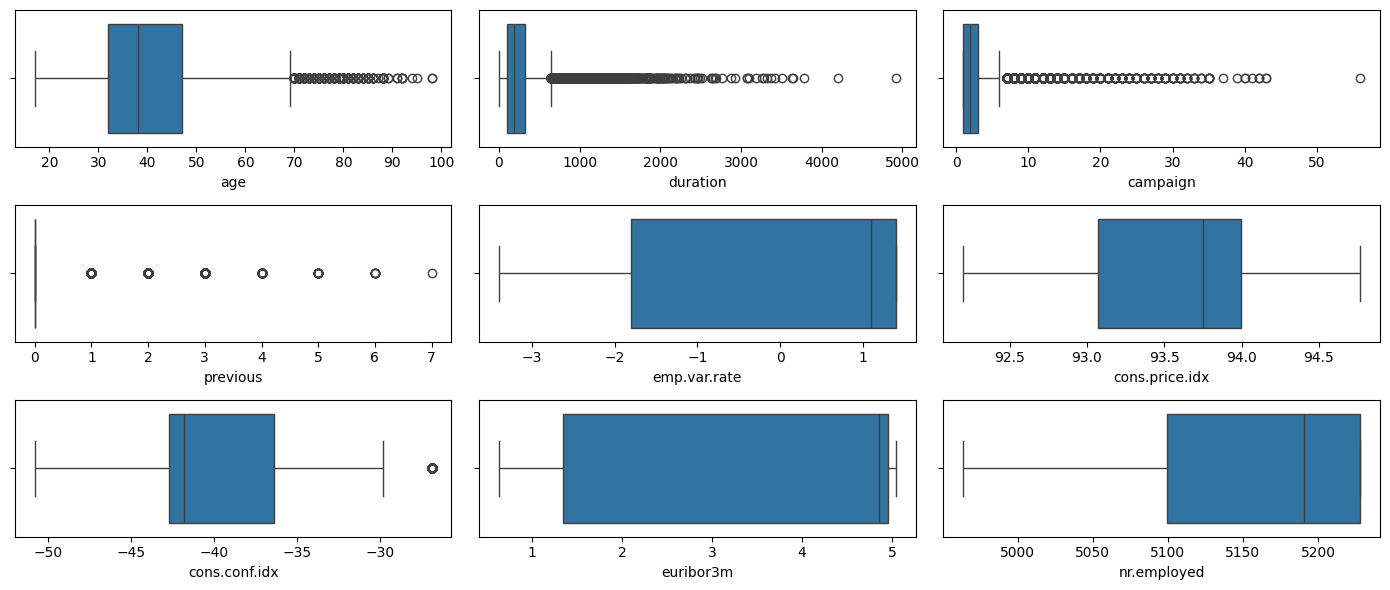

In [ ]:
# Valores extremos

# Crear boxplots
fig, axis = plt.subplots(3, 3, figsize = (14, 6))

for i, num in enumerate(numericas):
    row, col = i // 3, i % 3
    sns.boxplot(ax=axis[row,col], data=df_corr[numericas], x=num)

plt.tight_layout()
plt.show()

In [28]:
def analisis_ric(columna, df):
    estadisticas = df[columna].describe()
    ric = estadisticas['75%'] - estadisticas['25%']
    lim_sup = estadisticas['75%'] + 1.5*ric
    lim_inf = estadisticas['25%'] - 1.5*ric
    print(f'{columna}   lim_inferior: {lim_inf}, lim_superior: {lim_sup}')

In [ ]:
analisis_ric('duration', df_corr)

duration   lim_inferior: -223.5, lim_superior: 644.5


In [ ]:
(df_corr['duration'] > 3700).sum()

np.int64(3)

In [ ]:
print(f'df sin eliminar registros de duration: {df_corr.shape}')
df_corr = df_corr[df_corr['duration']<= 3700]
print(f'df con registros eliminados de duration: {df_corr.shape}')

df sin eliminar registros de duration: (41173, 18)
df con registros eliminados de duration: (41170, 18)


In [ ]:
analisis_ric('campaign', df_corr)

campaign   lim_inferior: -2.0, lim_superior: 6.0


In [ ]:
(df_corr['campaign'] > 40).sum()

np.int64(6)

In [ ]:
print(f'df sin eliminar registros de campaign: {df_corr.shape}')
df_corr = df_corr[df_corr['campaign'] <= 40]
print(f'df con registros eliminados de campaign: {df_corr.shape}')

df sin eliminar registros de campaign: (41170, 18)
df con registros eliminados de campaign: (41164, 18)


In [ ]:
analisis_ric('cons.conf.idx',df_corr)

cons.conf.idx   lim_inferior: -52.150000000000006, lim_superior: -26.949999999999992


In [ ]:
(df_corr['cons.conf.idx'] > -26.949).sum()

np.int64(446)

In [ ]:
outliers = df_corr[df_corr['cons.conf.idx'] > -26.949]
outliers.to_csv('../data/processed/consconfidx_Outliers.csv', index=False)
outliers

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
38154,50,6,0,4,0,1,0,1,4,305,2,1,-3.4,92.431,-26.9,0.754,5017.5,1
38155,37,2,1,4,0,1,0,1,4,447,3,0,-3.4,92.431,-26.9,0.754,5017.5,1
38156,59,4,1,0,0,0,0,1,4,86,1,2,-3.4,92.431,-26.9,0.754,5017.5,0
38157,31,2,0,4,0,1,0,1,4,760,1,0,-3.4,92.431,-26.9,0.754,5017.5,0
38158,35,2,0,1,0,1,0,1,4,194,1,1,-3.4,92.431,-26.9,0.754,5017.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38596,69,5,0,0,0,1,1,1,4,257,3,0,-3.4,92.431,-26.9,0.720,5017.5,1
38597,18,11,1,0,0,0,1,1,4,368,2,0,-3.4,92.431,-26.9,0.720,5017.5,1
38598,59,5,2,0,0,1,0,0,4,152,4,0,-3.4,92.431,-26.9,0.720,5017.5,0
38599,37,2,1,4,0,0,0,1,4,416,2,0,-3.4,92.431,-26.9,0.720,5017.5,1


In [38]:
df_clean = df_corr.copy()

mode = df_clean['cons.conf.idx'].mode()

replace_func = lambda x: x if x <= -26.94999 else mode

df_clean['cons.conf.idx'] = df_clean['cons.conf.idx'].apply(replace_func)



In [39]:
df_clean.to_csv('../data/processed/df_clean.csv', index=False)

MODELO

In [40]:
df_clean.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'duration', 'campaign', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [41]:
from sklearn.model_selection import train_test_split

X = df_clean.drop(['y'], axis=1)
y= df_clean['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
from sklearn.preprocessing import StandardScaler

predictoras = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
    'contact', 'month', 'duration', 'campaign', 'previous',
    'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
    'nr.employed']

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = predictoras)
X_train_norm.to_csv('../data/processed/X_train_normalizados.csv', index=False)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = predictoras)
X_test_norm.to_csv('../data/processed/X_test_normalizados.csv', index=False)

X_train_norm.head()

/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/_array_api.py:751: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/_array_api.py:751: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/_array_api.py:751: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)


,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
6102,1.439331,-1.090173,-0.733518,-0.492987,-0.512629,0.788833,-0.438990,-1.319230,-0.928301,-0.488412,-0.570439,-0.351051,0.646853,0.721430,0.955801,0.711339,0.328980
6256,-1.345614,0.137866,-0.733518,0.123664,-0.512629,0.788833,-0.438990,-1.319230,-0.928301,0.351423,-0.207083,-0.351051,0.646853,0.721430,0.955801,0.711339,0.328980
13799,-0.865451,0.137866,-0.733518,0.123664,-0.512629,-1.057046,1.747064,0.758018,-0.105247,0.913953,-0.570439,-0.351051,0.838030,0.590132,-0.469861,0.772503,0.843409
39316,-1.537679,0.137866,0.697918,0.123664,-0.512629,0.788833,-0.438990,-1.319230,1.952388,-0.361644,0.156272,-0.351051,-1.201186,-0.358324,1.317874,-1.720225,-2.198797
14298,-0.577353,-0.271480,-0.733518,-1.109638,-0.512629,0.788833,1.747064,0.758018,-0.105247,0.826800,0.156272,-0.351051,0.838030,0.590132,-0.469861,0.771926,0.843409


In [44]:
from sklearn.feature_selection import f_classif, SelectKBest

selection_model = SelectKBest(f_classif, k = 9)
selection_model.fit(X_train_norm, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train_norm), columns = X_train_norm.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_norm), columns = X_test_norm.columns.values[ix])

X_train_sel.head()

,default,contact,month,duration,previous,emp.var.rate,cons.price.idx,euribor3m,nr.employed
0,-0.512629,-1.319230,-0.928301,-0.488412,-0.351051,0.646853,0.721430,0.711339,0.328980
1,-0.512629,-1.319230,-0.928301,0.351423,-0.351051,0.646853,0.721430,0.711339,0.328980
2,-0.512629,0.758018,-0.105247,0.913953,-0.351051,0.838030,0.590132,0.772503,0.843409
3,-0.512629,-1.319230,1.952388,-0.361644,-0.351051,-1.201186,-0.358324,-1.720225,-2.198797
4,-0.512629,0.758018,-0.105247,0.826800,-0.351051,0.838030,0.590132,0.771926,0.843409


In [45]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_sel, y_train)

LogisticRegression()

In [48]:
y_pred = model.predict(X_test_sel)
print(y_pred)

[0 0 1 ... 0 0 0]


In [50]:
from sklearn.metrics import accuracy_score

acc_score = accuracy_score(y_test, y_pred)
acc_score

0.9079314952022349

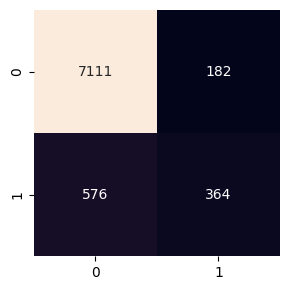

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

bank_mxconfusion = confusion_matrix(y_test, y_pred)

# Dibujaremos esta matriz para hacerla más visual
mxconfusion_df = pd.DataFrame(bank_mxconfusion)

plt.figure(figsize = (3, 3))
sns.heatmap(mxconfusion_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

In [59]:
tasa_conversion_antes = (364+182)*100/(7111+576+182+364)
print(f'Tasa de conversión del banco antes del modelo: {tasa_conversion_antes} %')

Tasa de conversión del banco antes del modelo: 6.631847443216325 %


In [61]:
tasa_conversion_modelo = 364*100/(364+182)
print(f'Tasa de conversión del banco implementando el modelo: {tasa_conversion_modelo} %')

Tasa de conversión del banco implementando el modelo: 66.66666666666667 %


In [70]:
from sklearn.model_selection import GridSearchCV

# Definimos los parámetros que queremos ajustar a mano
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Inicializamos la cuadrícula
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 9)
grid

GridSearchCV(cv=9, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [71]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train_sel, y_train)

print(f"Mejores hiperparámetros: {grid.best_params_}")

Mejores hiperparámetros: {'C': 0.001, 'penalty': None, 'solver': 'sag'}


In [72]:
best_model = grid.best_estimator_


In [75]:
y_best_pred = best_model.predict(X_test_sel)
nuevo_acc_score = accuracy_score(y_test, y_best_pred)

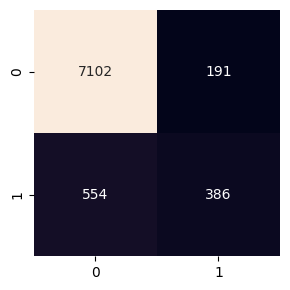

In [67]:
bank_mxconfusion = confusion_matrix(y_test, y_best_pred)

# Dibujaremos esta matriz para hacerla más visual
mxconfusion_df = pd.DataFrame(bank_mxconfusion)

plt.figure(figsize = (3, 3))
sns.heatmap(mxconfusion_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

In [76]:
print(acc_score)
print(nuevo_acc_score)
if acc_score >= nuevo_acc_score:
    print('El modelo no ha mejorado')
else:
    print('El modelo ha mejorado')

0.9079314952022349
0.9080529576096198
El modelo ha mejorado


In [81]:
from pickle import dump

dump(best_model, open("../models/best_logistic_model.sav", "wb"))